In [1]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv('preprocessing_iris.csv')

# Verify the data
print("Preprocessed data loaded:")
display(df.head())

Preprocessed data loaded:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


In [2]:
# Import required libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
features = df.columns[:-2]  # Exclude species and encoded species columns
cluster_labels = kmeans.fit_predict(df[features])

In [4]:
# Add cluster labels to dataframe
df['cluster'] = cluster_labels

In [5]:
# Calculate Adjusted Rand Index
ari = adjusted_rand_score(df['species_encoded'], cluster_labels)
print(f"\nAdjusted Rand Index (k=3): {ari:.3f}")


Adjusted Rand Index (k=3): 0.701


In [6]:
# Experiment with different k values
print("\nTesting different k values:")
for k in [2, 4]:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    temp_labels = kmeans_temp.fit_predict(df[features])
    print(f"ARI for k={k}: {adjusted_rand_score(df['species_encoded'], temp_labels):.3f}")


Testing different k values:
ARI for k=2: 0.568
ARI for k=4: 0.621


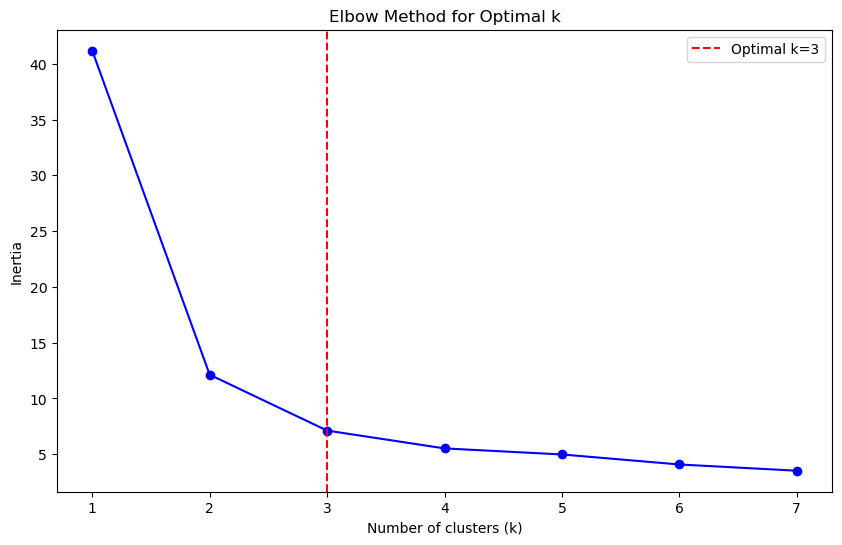

In [7]:
# Elbow method to determine optimal k
inertias = []
k_values = range(1, 8)

plt.figure(figsize=(10, 6))
for k in k_values:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42)
    kmeans_elbow.fit(df[features])
    inertias.append(kmeans_elbow.inertia_)

plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=3, color='r', linestyle='--', label='Optimal k=3')
plt.legend()
plt.show()


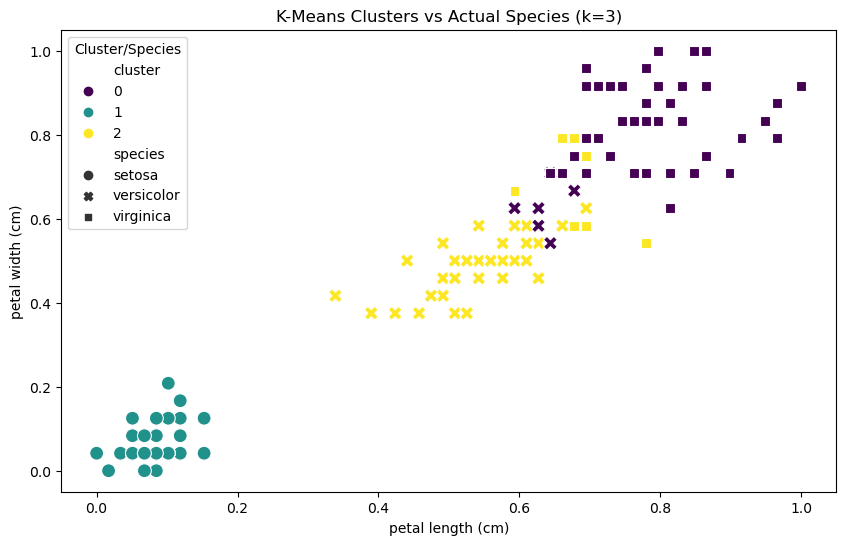

In [8]:
# Visualize clusters using petal features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)',
                hue='cluster', palette='viridis', s=100,
                style=df['species'])  # Show actual species with markers
plt.title('K-Means Clusters vs Actual Species (k=3)')
plt.legend(title='Cluster/Species')
plt.show()

In [9]:
# Cluster-species comparison
print("\nCluster-Species Comparison:")
print(pd.crosstab(df['species'], df['cluster']))


Cluster-Species Comparison:
cluster      0   1   2
species               
setosa       0  50   0
versicolor  10   0  40
virginica   42   0   8
